### Part 1 : Voronoi mesh generation

In [9]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [10]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='riverAquifer',maxRef = 100, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/riverAquifer/Shp/ModelLimit1.shp')
vorMesh.addLayer('ghb','../../examples/riverAquifer/Shp/ModelGHB1.shp',20)
vorMesh.addLayer('riv','../../examples/riverAquifer/Shp/ModelRiver2.shp',10)
vorMesh.addLayer('wel','../../examples/riverAquifer/Shp/ModelWell2.shp',2)


In [11]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()


/--------Layer ghb discretization-------/
Progressive cell size list: [20, 50.0, 95.0] m.

/--------Layer riv discretization-------/
Progressive cell size list: [10, 25.0, 47.5, 81.25] m.

/--------Layer wel discretization-------/
Progressive cell size list: [2, 5.0, 9.5, 16.25, 26.375, 41.5625, 64.34375, 98.515625] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 3
Points from layer buffers: 2437
Points from max refinement areas: 412
Points from min refinement areas: 1335
Total points inside the limit: 4741
/--------------------------------------------/

Time required for point generation: 0.87 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 0.13 seconds 



In [12]:
#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')


/----Generation of the voronoi shapefile----/
The output folder output exists

Time required for voronoi shapefile: 3.08 seconds 



In [13]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')

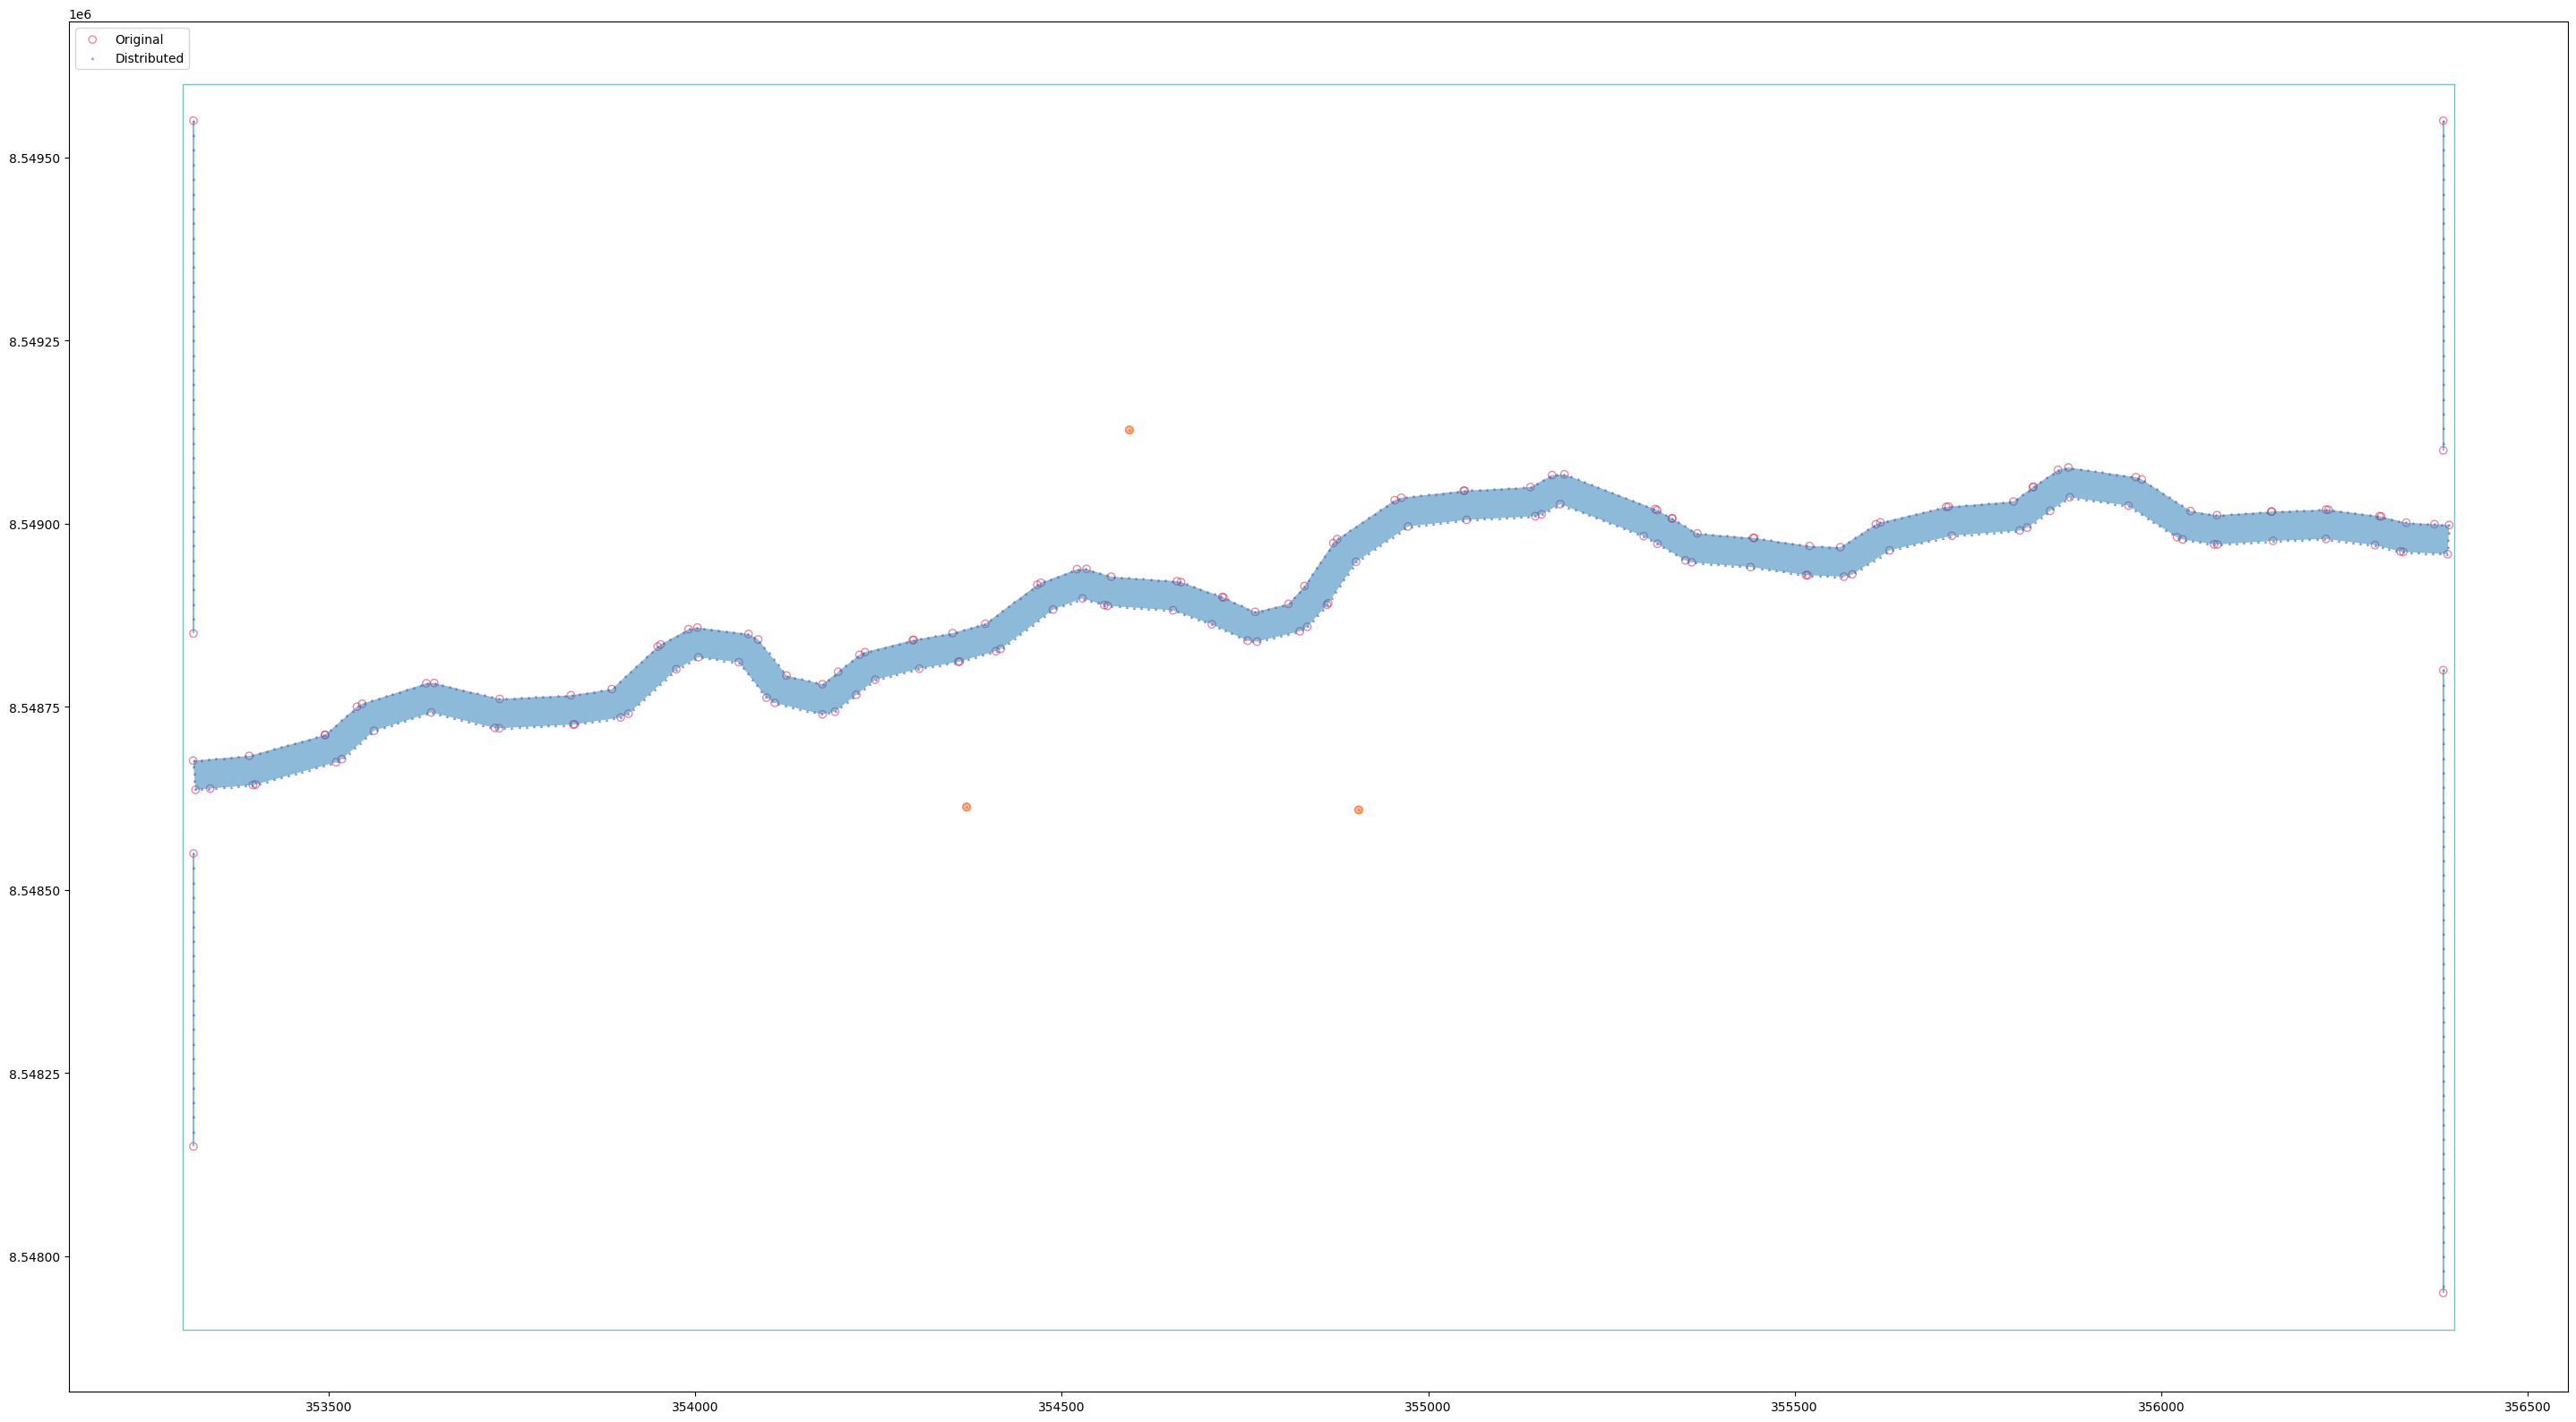

In [14]:
plotOrgDistPoints(vorMesh)

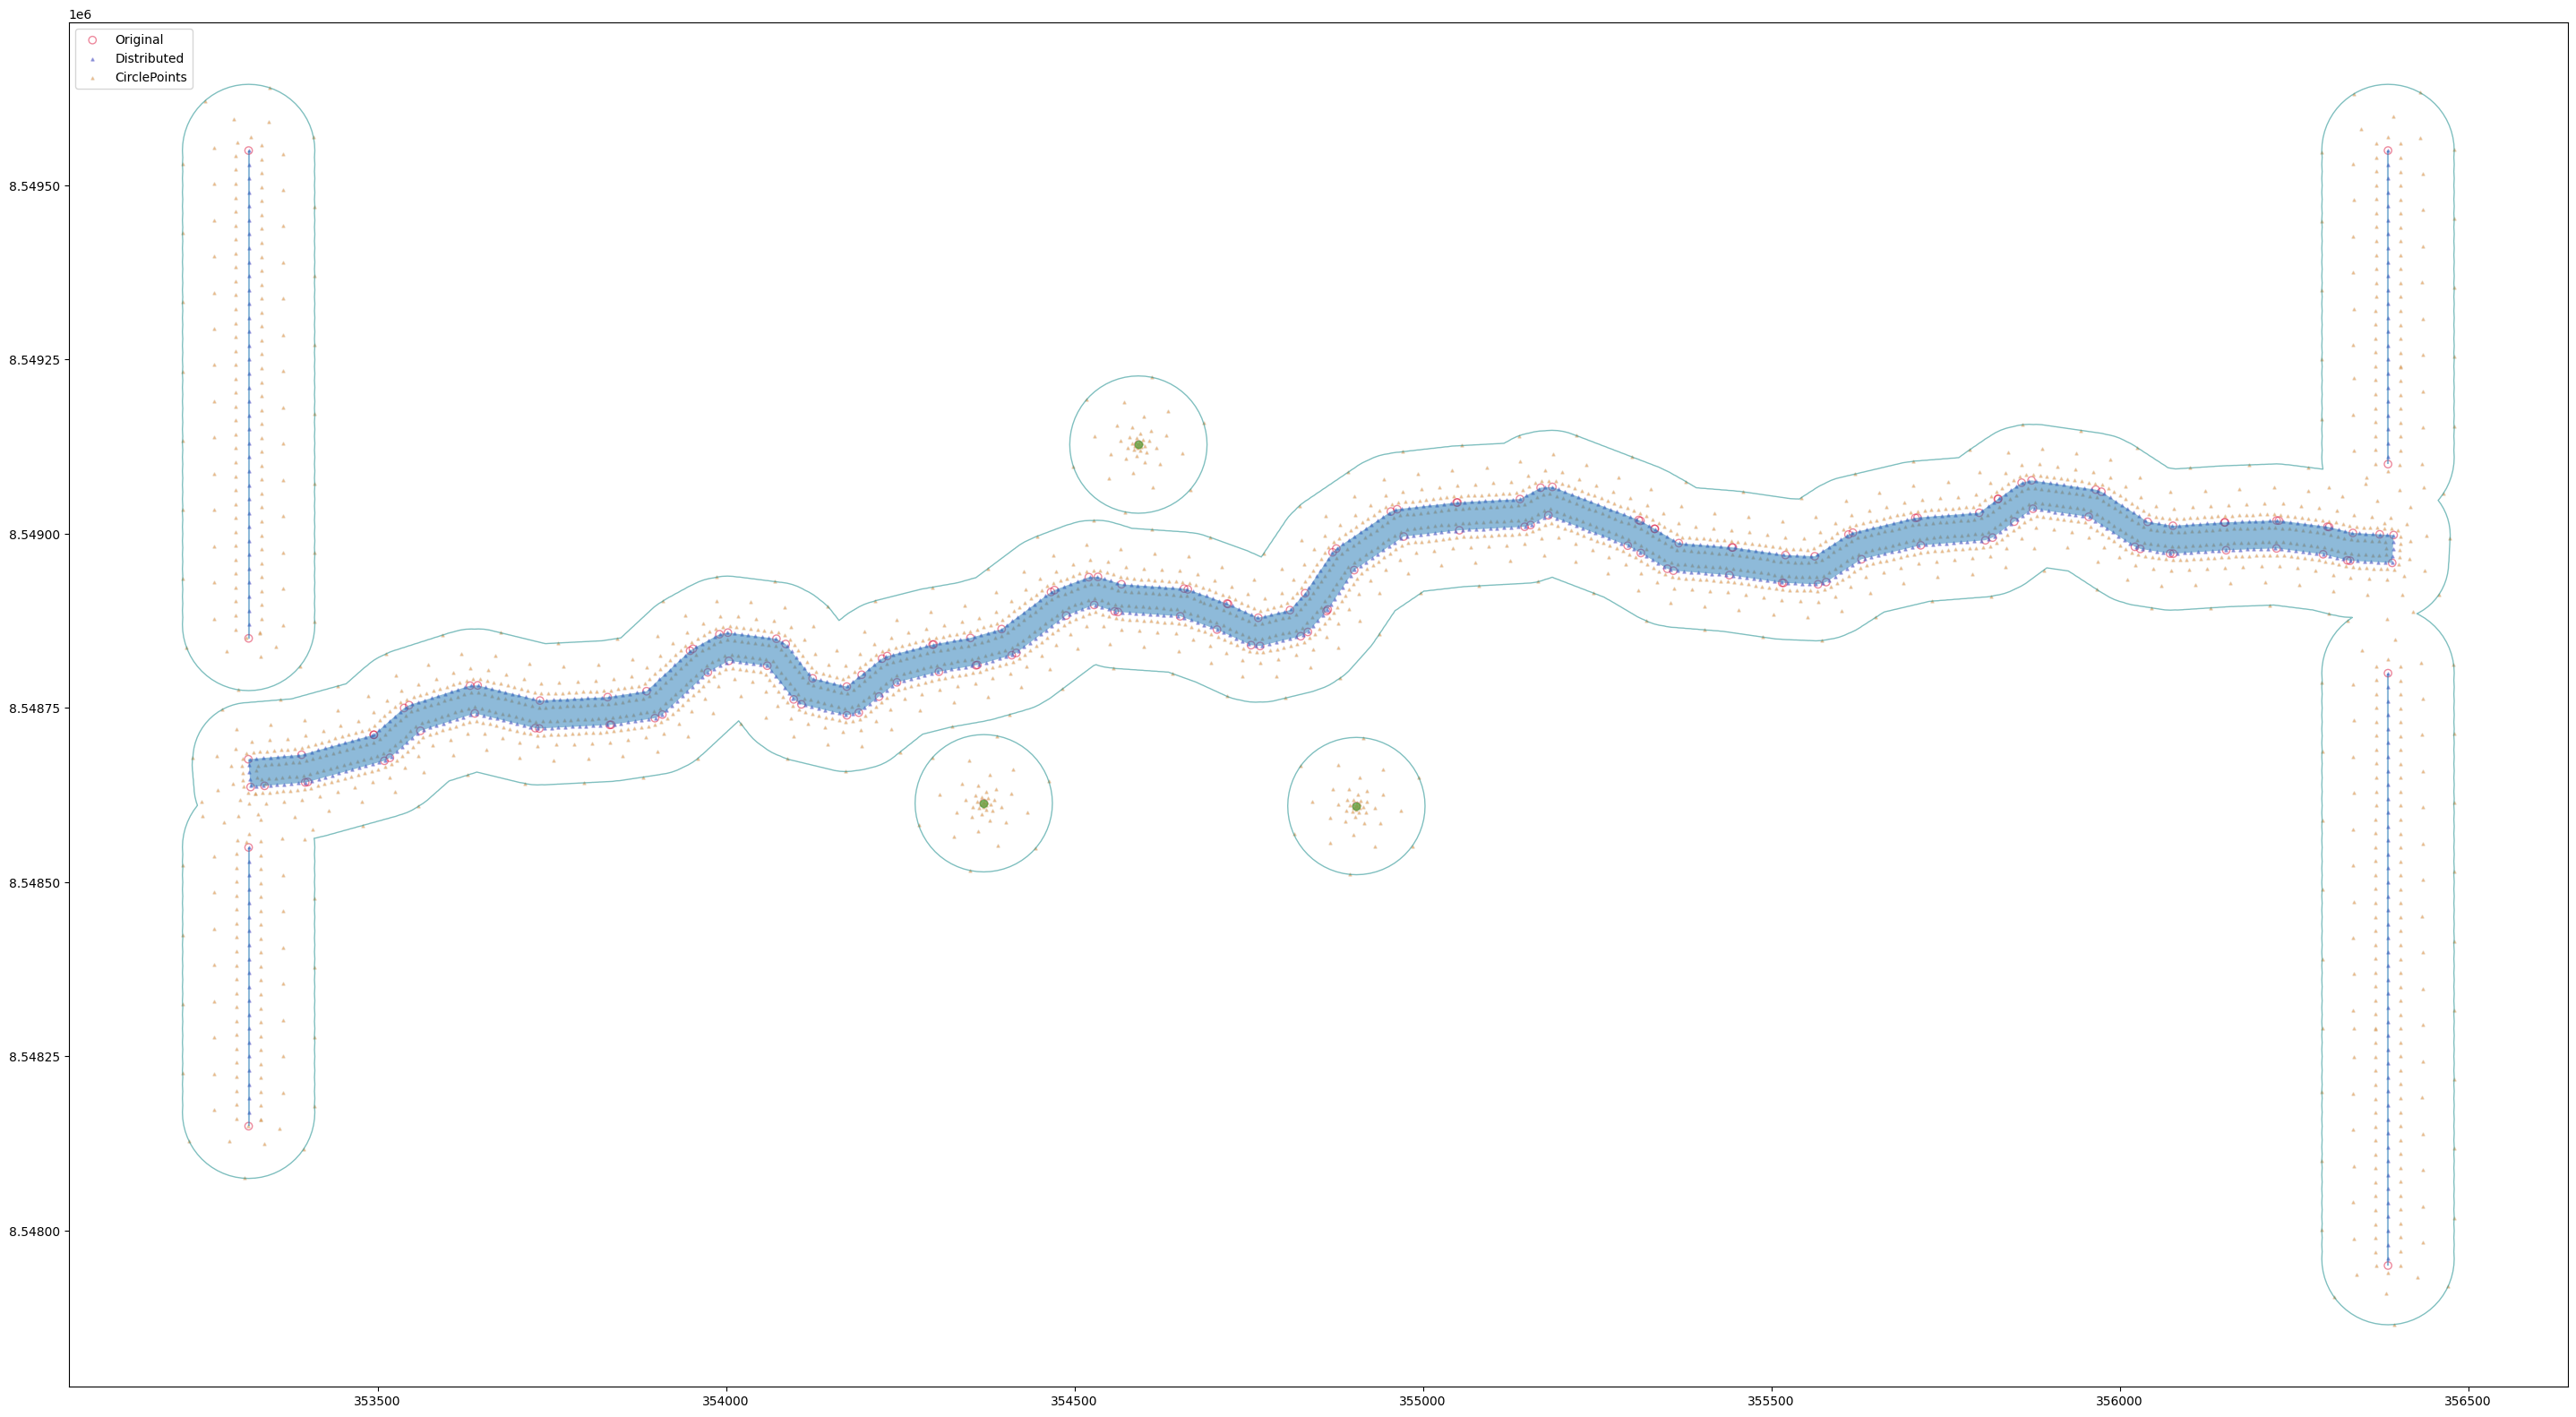

In [15]:
plotCirclesPoints(vorMesh)

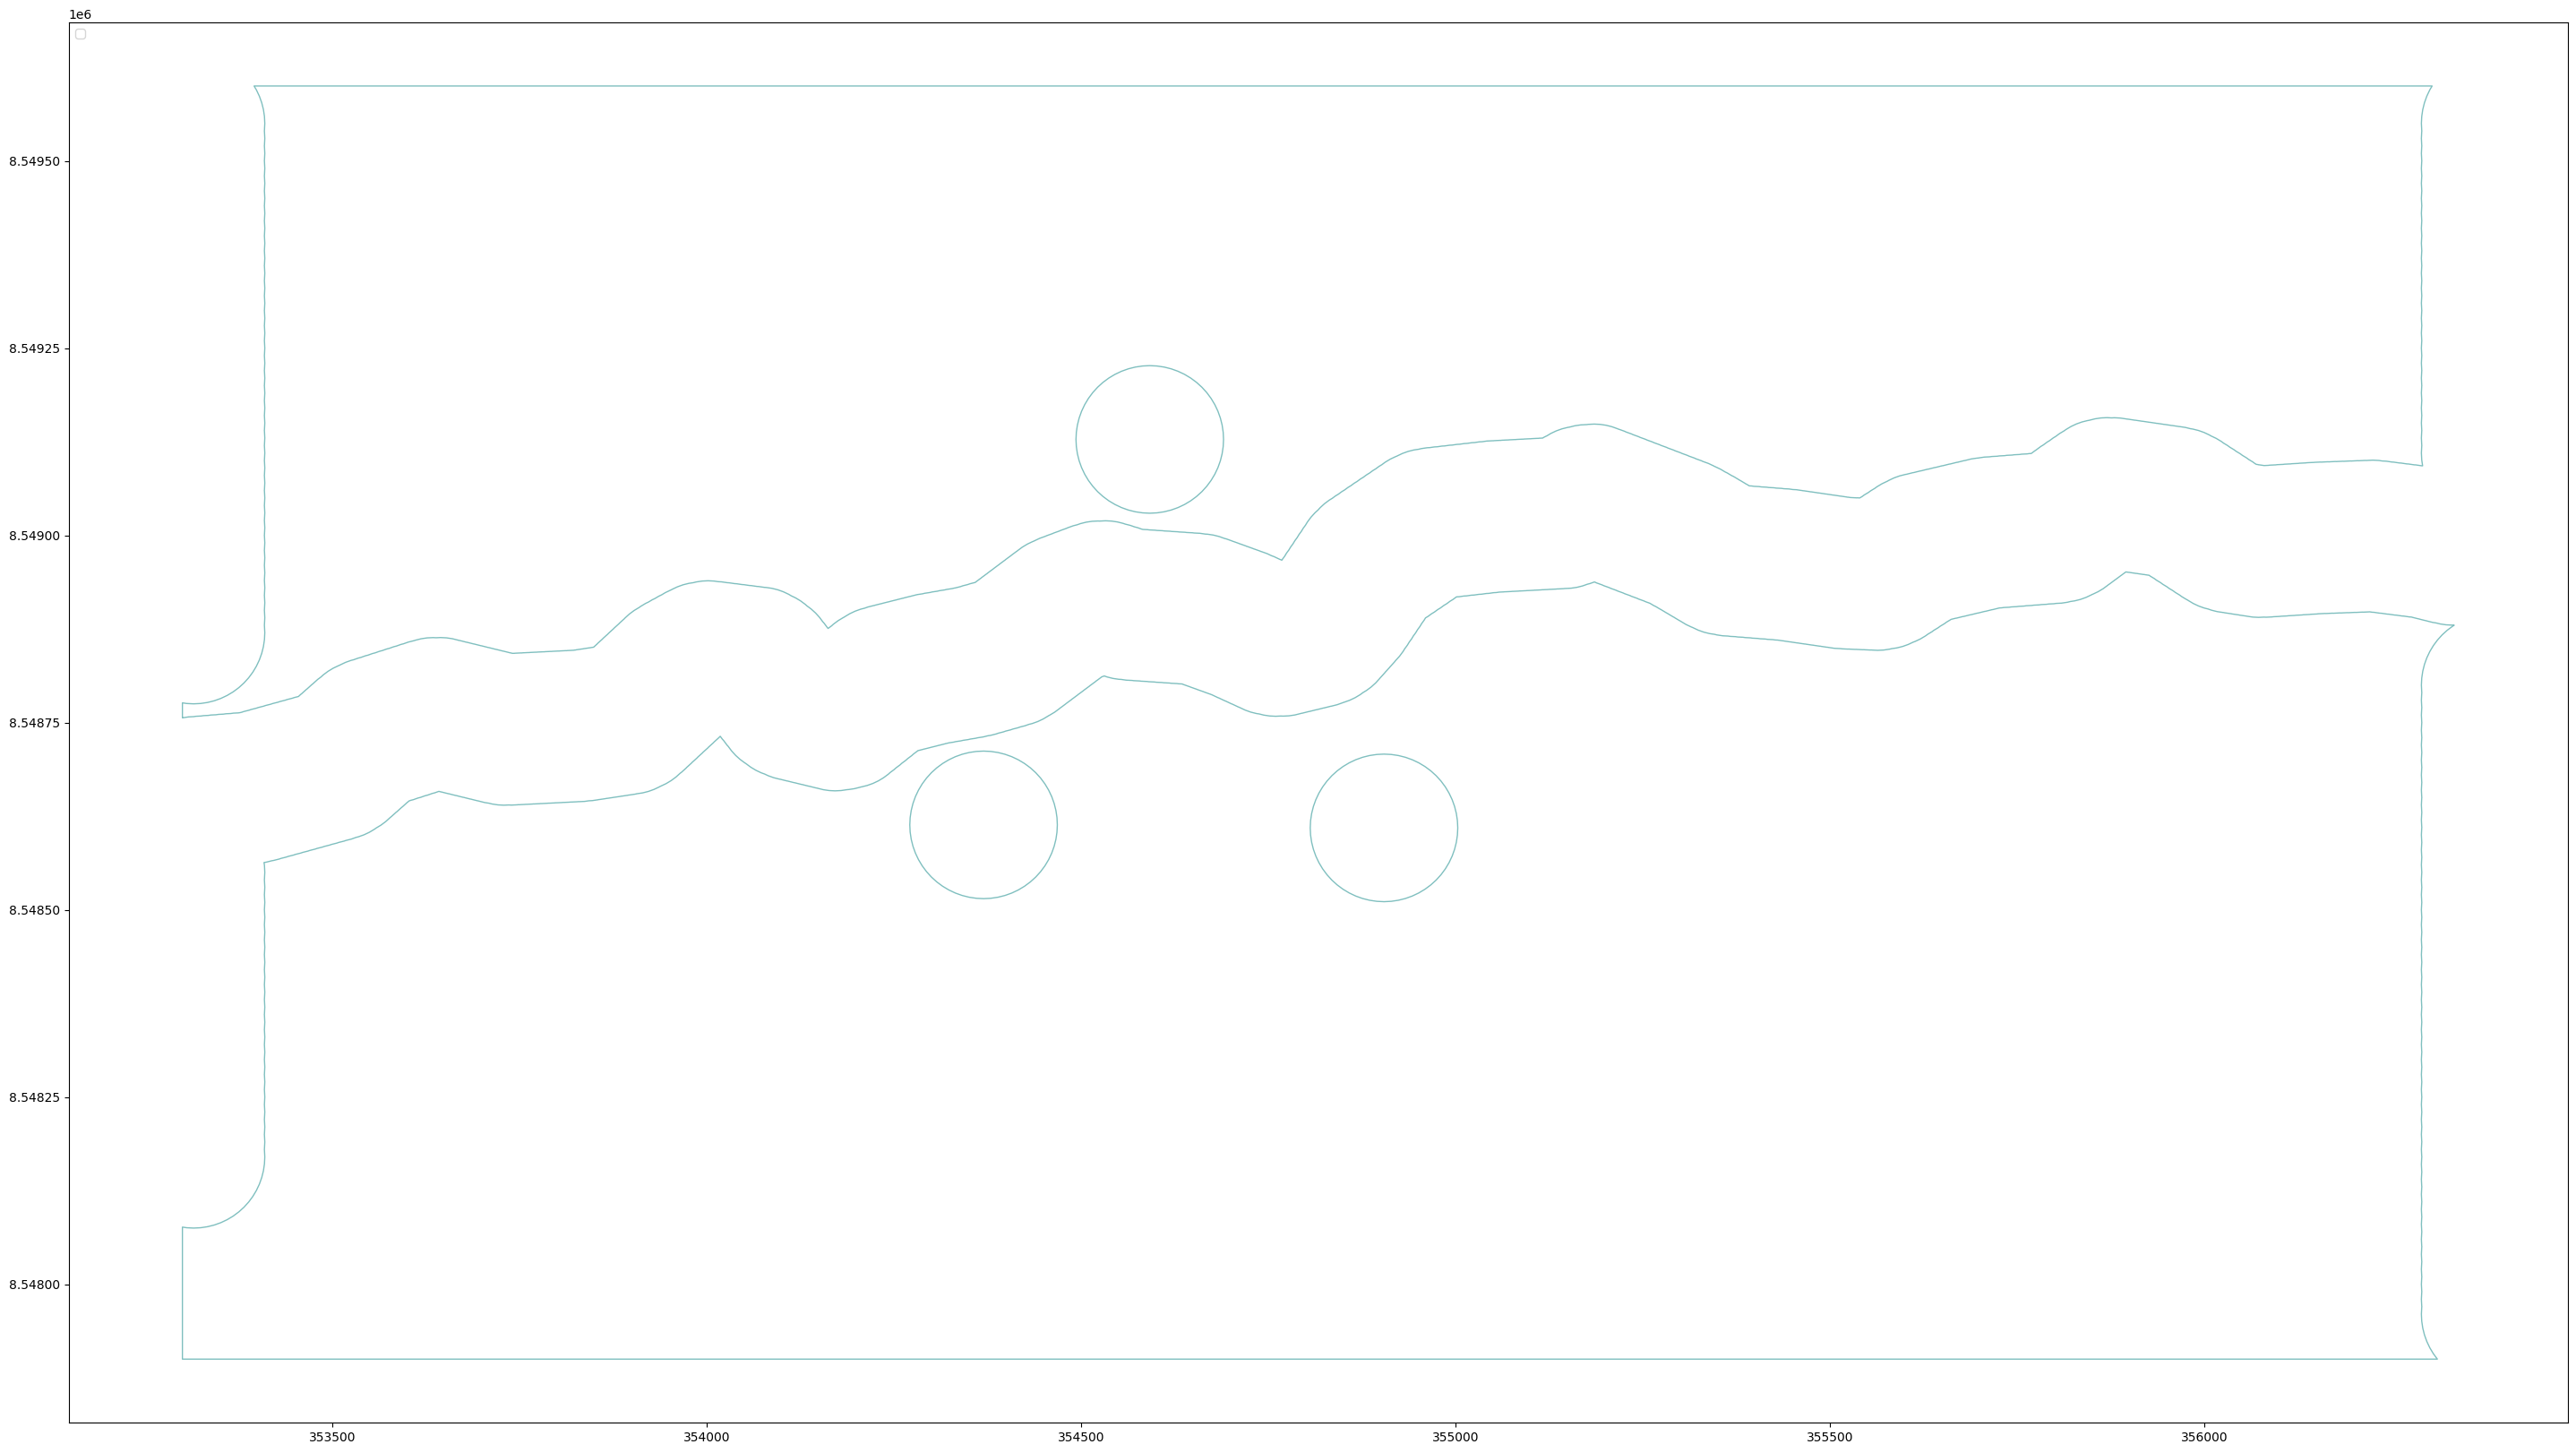

In [16]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

<Axes: >

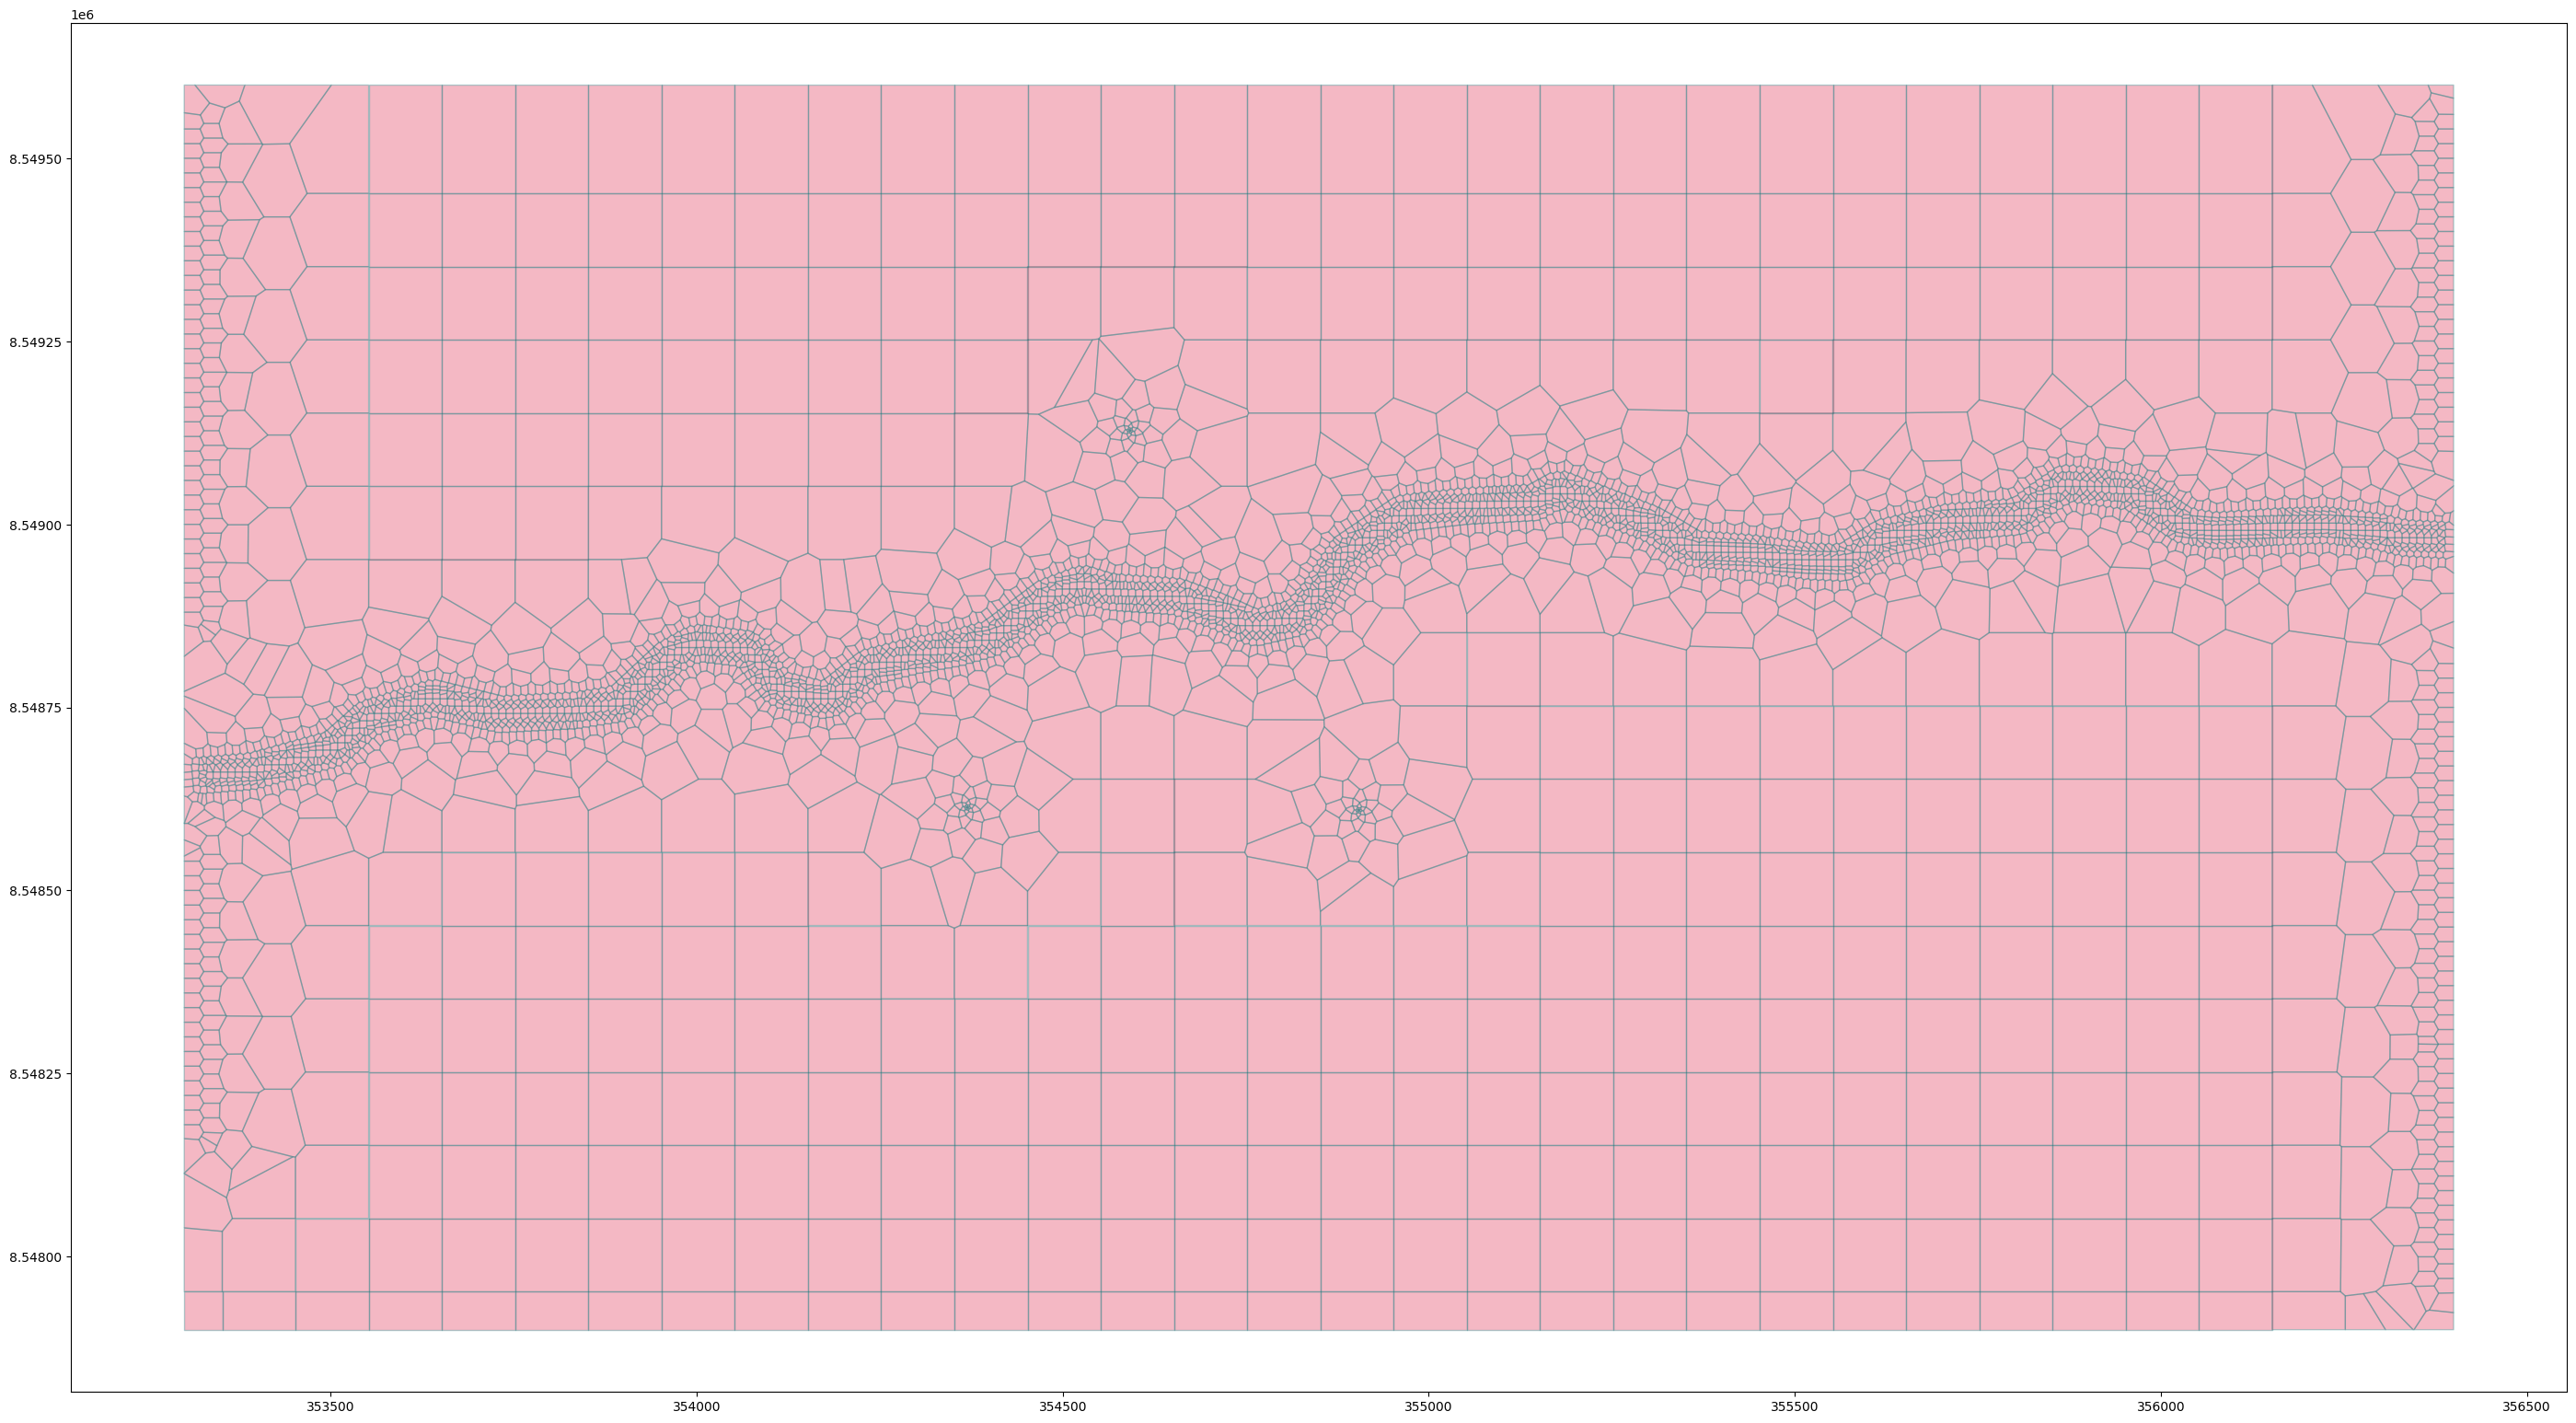

In [18]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')